In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install keras

In [3]:
#!pip install tensorflow

In [4]:
data = pd.read_csv("M0424_2562_RMF.csv",parse_dates=['nav_date']) 

#1."M0017_2565_SSF.csv"

#2. M0110_2564_SSF.csv

#3. "M0005_2558_SSF.csv"

#4. M0120_2564_SSF.csv

#5.M0134_2564_SSF.csv

#6."M0144_2563_SSF.csv"

#7.M0151_2563_SSF.csv

#8.M0152_2564_SSF.csv


In [5]:
data.tail(20)

,nav_date,net_asset,last_val,sell_price,buy_price,sell_swap_price,buy_swap_price
890,2023-07-11,2.113719e+08,7.9700,7.9701,7.9700,7.9700,7.9701
891,2023-07-12,2.127665e+08,8.0210,8.0211,8.0210,8.0210,8.0211
892,2023-07-13,2.142225e+08,8.0727,8.0728,8.0727,8.0727,8.0728
893,2023-07-14,2.155514e+08,8.1251,8.1252,8.1251,8.1251,8.1252
894,2023-07-17,2.151233e+08,8.1075,8.1076,8.1075,8.1075,8.1076
895,2023-07-18,2.149349e+08,8.0960,8.0961,8.0960,8.0960,8.0961
896,2023-07-19,2.139223e+08,8.0523,8.0524,8.0523,8.0523,8.0524
897,2023-07-20,2.146513e+08,8.0770,8.0771,8.0770,8.0770,8.0771
898,2023-07-21,2.149879e+08,8.0888,8.0889,8.0888,8.0888,8.0889
899,2023-07-24,2.145588e+08,8.0715,8.0716,8.0715,8.0715,8.0716


In [6]:
data.describe()

,net_asset,last_val,sell_price,buy_price,sell_swap_price,buy_swap_price
count,9.100000e+02,910.000000,910.000000,910.000000,910.000000,910.000000
mean,1.788391e+08,8.746053,8.361886,8.361791,7.075805,7.075840
std,4.480503e+07,0.539184,1.869023,1.869003,3.504850,3.504862
min,1.907957e+07,7.018800,0.000000,0.000000,0.000000,0.000000
25%,1.377431e+08,8.378875,8.271250,8.271150,7.999500,7.999450
50%,1.975705e+08,8.747200,8.729150,8.729050,8.674900,8.675000
75%,2.151351e+08,9.012900,8.998375,8.998275,8.998275,8.998375
max,2.302065e+08,10.192100,10.192200,10.192100,10.192200,10.192100


In [7]:
data.isnull().sum()

nav_date           0
net_asset          0
last_val           0
sell_price         0
buy_price          0
sell_swap_price    0
buy_swap_price     0
dtype: int64

In [8]:
data['nav_date'] = pd.to_datetime(data['nav_date'])

In [9]:
monthly_avg = data.set_index('nav_date').resample('M').mean()

In [10]:
dfmonth = monthly_avg["last_val"]

In [11]:
df = pd.DataFrame(dfmonth)

In [12]:
df

,last_val
nav_date,
2019-09-30,10.066323
2019-10-31,10.109181
2019-11-30,9.804886
2019-12-31,9.564806
2020-01-31,9.855087
2020-02-29,9.923406
2020-03-31,8.466868
2020-04-30,8.098719
2020-05-31,8.678144


In [13]:
df.shape

(48, 1)

In [14]:
df = df.dropna()

In [15]:
df.shape

(48, 1)

In [16]:
#df = df.reshape(-1,1)

In [17]:
scaler = MinMaxScaler(feature_range = (0,1))
dfnew = scaler.fit_transform(df)
dfnew

array([[0.97968158],
       [1.        ],
       [0.855738  ],
       [0.74191972],
       [0.87953793],
       [0.91192666],
       [0.22140375],
       [0.04686971],
       [0.32156669],
       [0.48174351],
       [0.39222935],
       [0.37387988],
       [0.43031024],
       [0.24047943],
       [0.20872239],
       [0.3011924 ],
       [0.32202208],
       [0.2210343 ],
       [0.31833215],
       [0.42775913],
       [0.36506664],
       [0.47566834],
       [0.54066067],
       [0.54461398],
       [0.52590793],
       [0.51966285],
       [0.54944964],
       [0.46366687],
       [0.36733988],
       [0.32692774],
       [0.41109619],
       [0.47728817],
       [0.34071862],
       [0.30180946],
       [0.3137917 ],
       [0.41752201],
       [0.29806117],
       [0.        ],
       [0.00303582],
       [0.01424837],
       [0.12690883],
       [0.24076862],
       [0.10822885],
       [0.13711255],
       [0.08686636],
       [0.03534041],
       [0.02066274],
       [0.004

In [18]:
#train_size = int(len(dfnew)-5)
#test_size = len(dfnew) - train_size
train_size = int(len(dfnew)*0.70)
test_size = len(dfnew) - train_size
train = dfnew[0:train_size,:]
test = dfnew[train_size:len(dfnew),:]
print("train size: {} , test size: {}".format(len(train),len(test)))

train size: 33 , test size: 15


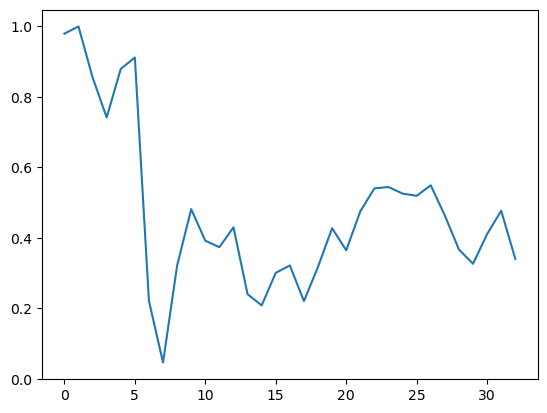

In [19]:
plt.plot(train)

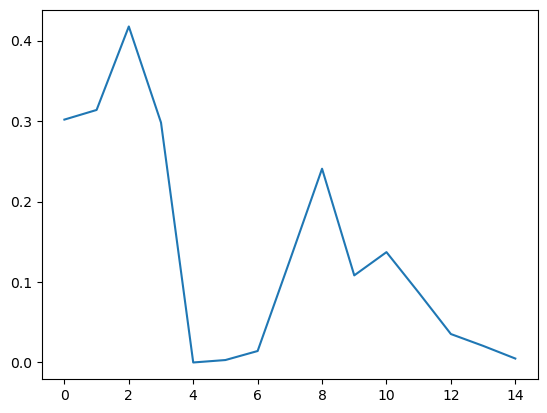

In [20]:
plt.plot(test)

In [21]:
nums = 5

In [22]:
X_train = []
y_train = []
for i in range(nums,train_size):
    X_train.append(train[i-nums:i,0])
    y_train.append(train[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [23]:
print(X_train.shape)
print(y_train.shape)

(28, 5)
(28,)


In [24]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [25]:
X_train.shape

(28, 5, 1)

In [26]:
train.shape

(33, 1)

In [27]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [28]:
#hyperparameter juning

In [29]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(
    seed_value 
)

In [30]:
regressor = Sequential()
regressor.add(LSTM(units = 100,return_sequences=True,input_shape = (X_train.shape[1],1),seed = 42))
regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 100,return_sequences = True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 100,return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))


regressor.add(Dense(units = 1))


In [31]:
regressor.compile(optimizer = 'adam',loss = "mean_squared_error")
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 0.1727
Epoch 2/20
1/1 [==============================] - 0s 15ms/step - loss: 0.1465
Epoch 3/20
1/1 [==============================] - 0s 15ms/step - loss: 0.1249
Epoch 4/20
1/1 [==============================] - 0s 15ms/step - loss: 0.1010
Epoch 5/20
1/1 [==============================] - 0s 12ms/step - loss: 0.0806
Epoch 6/20
1/1 [==============================] - 0s 15ms/step - loss: 0.0625
Epoch 7/20
1/1 [==============================] - 0s 13ms/step - loss: 0.0470
Epoch 8/20
1/1 [==============================] - 0s 14ms/step - loss: 0.0357
Epoch 9/20
1/1 [==============================] - 0s 14ms/step - loss: 0.0288
Epoch 10/20
1/1 [==============================] - 0s 15ms/step - loss: 0.0333
Epoch 11/20
1/1 [==============================] - 0s 15ms/step - loss: 0.0436
Epoch 12/20
1/1 [==============================] - 0s 13ms/step - loss: 0.0336
Epoch 13/20
1/1 [==============================] - 0s 14ms/step

In [32]:
test.shape

(15, 1)

In [33]:
X_test = []
for i in range(nums, test_size):
    X_test.append(test[i-nums:i, 0])

In [34]:
X_test = np.array(X_test)

In [35]:
X_test.shape

(10, 5)

In [36]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [37]:
X_test.shape

(10, 5, 1)

In [38]:
X_test2 = test.copy()

In [39]:
X_test2 = X_test2.reshape(-1,1)

In [40]:
#X_test3 = X_test2[98:]

In [41]:
#X_test3 = X_test3.reshape(-1,1)

In [42]:
train2 = scaler.inverse_transform(train)
test2 = scaler.inverse_transform(test)

In [43]:
sumtrain = np.append(train2, test2)

In [44]:
test2.shape

(15, 1)

In [45]:
testnew_data = np.delete(test2, range(nums), axis=0)

In [46]:
testnew_data.shape


(10, 1)

In [47]:
predicts = regressor.predict(X_test)
predicts = scaler.inverse_transform(predicts)

1/1 [==============================] - 1s 952ms/step


In [48]:
df_sum = np.append(train, test)

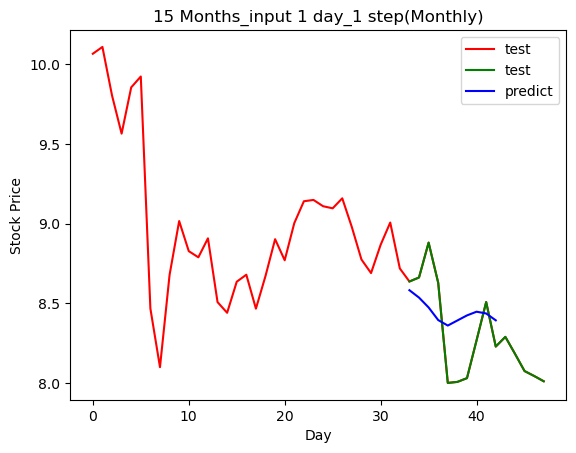

In [49]:
plt.plot(sumtrain,color = 'red',label="test")
plt.plot(range(train_size,train_size+test_size),test2,color = 'green',label="test")
plt.plot(range(train_size,train_size+test_size-nums),predicts,color = 'blue',label = 'predict')
plt.title(str(test_size)+" Months_input 1 day_1 step(Monthly)")
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()

In [50]:
MSE_error = mean_squared_error(testnew_data, predicts)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.11673385327035632
